# Employee Attrition
When an employee leaves the company through any method, including voluntary resignations, layoffs, failure to return from a leave of absence, or even illness or death.

## Importing the relevant libraries

In [3]:
# For this dataset we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.ticker import PercentFormatter
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import shap

## Loading the raw data

In [4]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('Employee_Attrition.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#save original data
original_data=raw_data

## Preprocessing

### Exploring the descriptive statistics of the variables

In [6]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, we should specify this with an argument
raw_data.describe(include='all')

# Categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [7]:
#check no. of rows & cols
raw_data.shape   #rows=1470 col=35

(1470, 35)

In [8]:
#check cols
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
#check gender col
raw_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Dealing with missing values

In [10]:
# data.isnull() # shows a df with the information whether a data point is null
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
raw_data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


### Dropping the unnecessary cols

In [11]:
raw_data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [12]:
raw_data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,2.721769,NaN,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,1.093082,NaN,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,2.000000,NaN,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,3.000000,NaN,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,4.000000,NaN,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [14]:
#check no. of rows & cols
raw_data.shape   #rows=1470 col=31 (drop 4 unnecessary cols)

(1470, 31)

### Distribution of Employee Attrition

In [15]:
#counts of attrition
raw_data.Attrition.value_counts()

per=raw_data.Attrition.value_counts()/1470*100
print(per)

Attrition
No     83.877551
Yes    16.122449
Name: count, dtype: float64


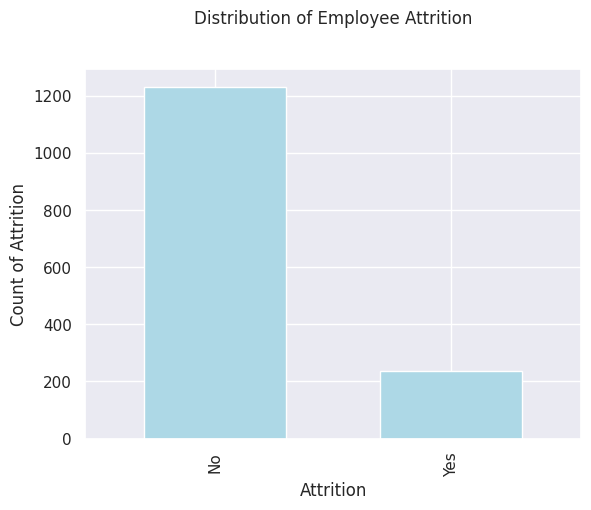

In [16]:
#Check the target variable (Attrition)
raw_data.groupby('Attrition')['Attrition'].agg('count').plot.bar(color='lightblue',width=0.6)
plt.xlabel("Attrition")
plt.ylabel("Count of Attrition")
plt.title("Distribution of Employee Attrition",y=1.1)
plt.show()

Note!

The dataset is quite heavily imbalanced.

## EDA

##### Now check the relationships between variables through exploratory data analysis in order to get an idea, on what factors an employees attrition depends.

In [17]:
# convert categorical to numerical
raw_data['Attrition']=raw_data['Attrition'].map({'Yes':1,'No':0})

Plot the factors on the x and the attrition for that factor on the y axis.

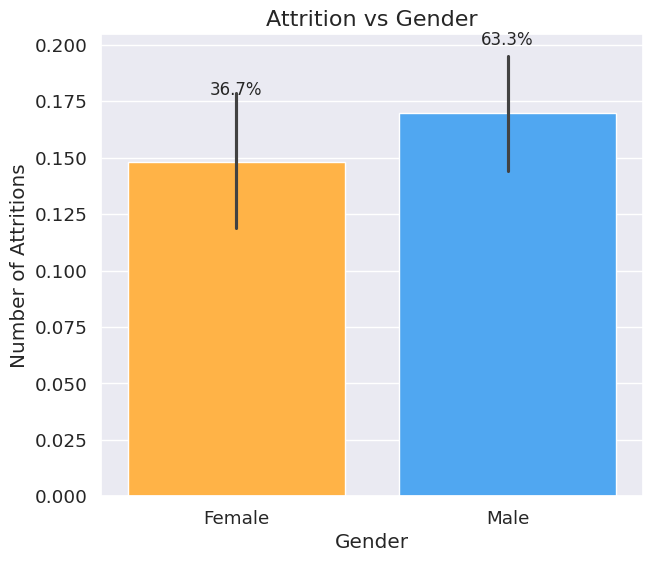

In [90]:
#1) Relationship b/w target and Gender

#check male & female against Attrition['Yes]'

freq_Attrition = raw_data.Attrition.value_counts()
attrition_total = freq_Attrition[1]

female_attr = sum((raw_data.Attrition == 1) & (raw_data.Gender == "Female"))
male_attr = sum((raw_data.Attrition == 1) & (raw_data.Gender == "Male"))

per = round(female_attr / attrition_total * 100, 1), round(male_attr / attrition_total * 100, 1)

# Plot
plt.figure(figsize=(7,6))
plt.title("Attrition vs Gender", fontsize=16)

# Base barplot (gray) to override colors manually
ax = sns.barplot(x='Gender', y='Attrition', data=raw_data, color='lightgray')

# Set shades of blue for each bar
colors = ['#FFB347', '#50A7F1']  # orange for Female, lighter blue for Male
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])

# Annotate percentages on top of bars
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width() / 2
    y_pos = patch.get_height() + 0.03
    ax.annotate(f'{per[i]}%', (x_pos, y_pos), ha='center', fontsize=12)

plt.ylabel('Number of Attritions')
plt.show()


As we know, the dataset is quite heavily imbalanced.So according to "Yes" attrition, 37.0% Female tends to leave and 63.0% Male tends to leave.

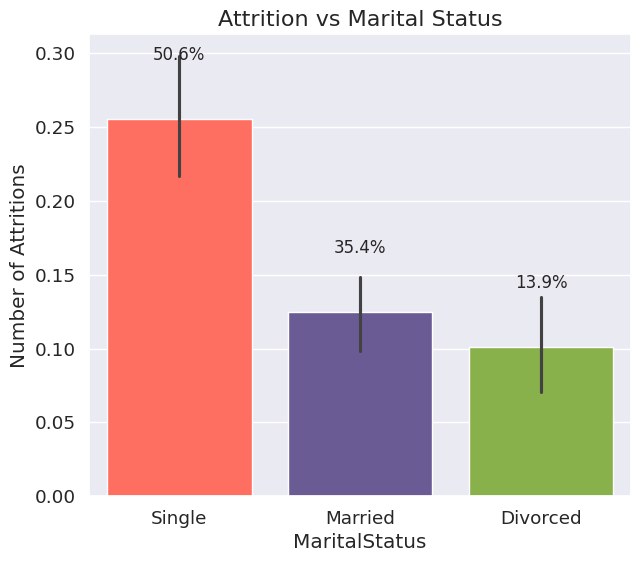

In [86]:
#2) Relationship b/w target and Marital status

freq_Attrition = raw_data.Attrition.value_counts()
attrition_total = freq_Attrition[1]

a = sum((raw_data.Attrition == 1) & (raw_data.MaritalStatus == "Single"))
b = sum((raw_data.Attrition == 1) & (raw_data.MaritalStatus == "Married"))
c = sum((raw_data.Attrition == 1) & (raw_data.MaritalStatus == "Divorced"))

per = round(a / attrition_total * 100, 1), round(b / attrition_total * 100, 1), round(c / attrition_total * 100, 1)

# Plot
plt.figure(figsize=(7,6))
plt.title("Attrition vs Marital Status", fontsize=16)

# Barplot without automatic palette
ax = sns.barplot(x='MaritalStatus', y='Attrition', data=raw_data, color='lightgray')

# Manually change each bar's color
colors = ['#FF6F61', '#6B5B95', '#88B04B']  # different color per bar
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])

# Annotate percentages on top of bars
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width() / 2
    y_pos = patch.get_height() + 0.04
    ax.annotate(f'{per[i]}%', (x_pos, y_pos), ha='center', fontsize=12)

plt.ylabel('Number of Attritions')
plt.show()


According to "Yes" 51.0% single tends to leave,35.0% tends to leave and 14.0% Divorced employees tends to leave.

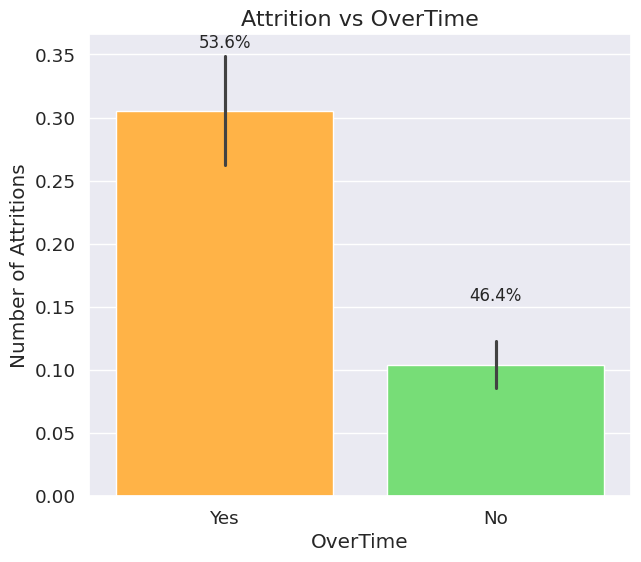

In [87]:
#3) Relationship b/w target variable and overtime

freq_Attrition = raw_data.Attrition.value_counts()
attrition_total = freq_Attrition[1]

x = sum((raw_data.Attrition == 1) & (raw_data.OverTime == "Yes"))
y = sum((raw_data.Attrition == 1) & (raw_data.OverTime == "No"))

per = round(x / attrition_total * 100, 1), round(y / attrition_total * 100, 1)

# Plot
plt.figure(figsize=(7,6))
plt.title("Attrition vs OverTime", fontsize=16)

# Base barplot (gray) to override colors manually
ax = sns.barplot(x='OverTime', y='Attrition', data=raw_data, color='lightgray')

# Set distinct colors for each bar
colors = ['#FFB347', '#77DD77']  # e.g., orange for 'Yes', green for 'No'
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])

# Annotate percentages on top of bars
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width() / 2
    y_pos = patch.get_height() + 0.05
    ax.annotate(f'{per[i]}%', (x_pos, y_pos), ha='center', fontsize=12)

plt.ylabel('Number of Attritions')
plt.show()


According to "Yes" attrition, 54.0% employee who are working overtime tends to leave.

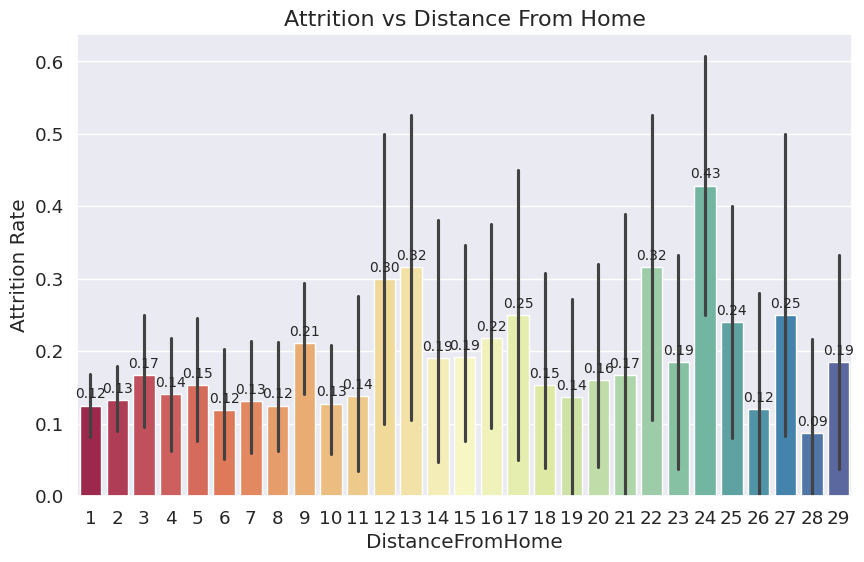

In [91]:
#4) Relationship b/w target variable and Distance From Home

# Get unique distance values
distances = sorted(raw_data['DistanceFromHome'].unique())

# Create a color palette with as many colors as unique distances
palette = sns.color_palette("Spectral", len(distances))  # multicolor palette

plt.figure(figsize=(10,6))
plt.title("Attrition vs Distance From Home", fontsize=16)

# Plot barplot with custom colors for each distance
ax = sns.barplot(x='DistanceFromHome', y='Attrition', data=raw_data, palette=palette)

# Annotate percentage values on top of bars
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width() / 2
    y_pos = patch.get_height() + 0.01
    ax.annotate(f'{patch.get_height():.2f}', (x_pos, y_pos), ha='center', fontsize=10)

plt.ylabel('Attrition Rate')
plt.show()


5) Relationship b/w target variable and Monthly Income

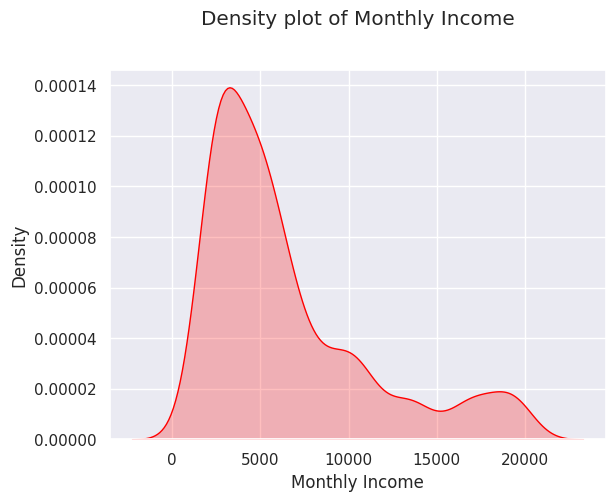

In [23]:
# Create a density plot of the Monthly income

sns.kdeplot( raw_data['MonthlyIncome'],fill=True,color='red')

# Set labels and title
# Add axis labels and plot title
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set(font_scale=1.2)
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.title("Density plot of Monthly Income",y=1.1)
plt.show()

Text(0.5, 1.1, 'Box plot of Attrition & Monthly Income')

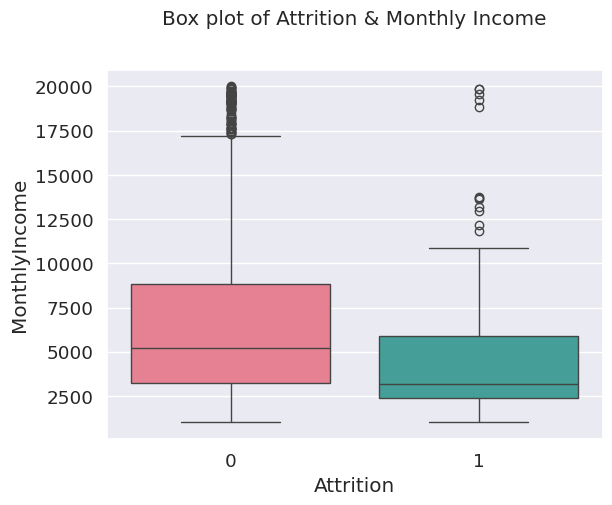

In [65]:
# Create a box plot of the Monthly income

# Ignore all warnings in the notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.boxplot(x = raw_data['Attrition'],y = raw_data['MonthlyIncome'],color='lightblue',orient='v',palette="husl")
#sns.stripplot(x = raw_data['Attrition'],y = raw_data['MonthlyIncome'], data=raw_data, color="black")
plt.title("Box plot of Attrition & Monthly Income",y=1.1)

A large majority of low monthly income tends to leave than the group of high monthly income.

In [25]:
#correlation between monthly income and attrtion
correlation = raw_data['Attrition'].corr(raw_data['MonthlyIncome'])
print(correlation)

-0.15983958238498835


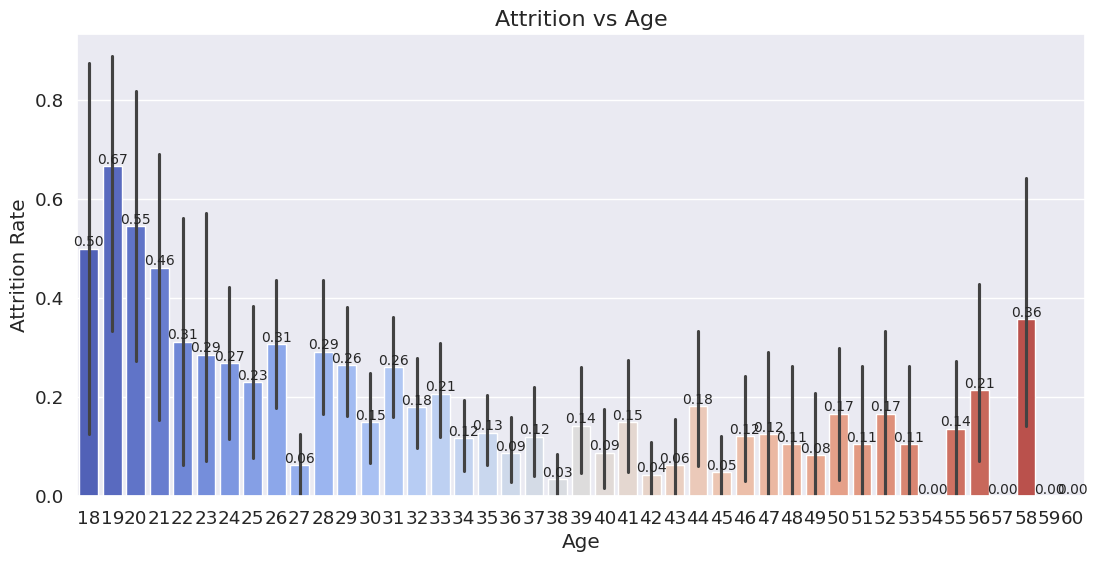

In [92]:
#6) Relationship b/w target variable and Age

# Get unique age values
ages = sorted(raw_data['Age'].unique())

# Create a new color palette (distinct from previous)
palette = sns.color_palette("coolwarm", len(ages))  # gradient from cool to warm colors

plt.figure(figsize=(13,6))
plt.title("Attrition vs Age", fontsize=16)

# Barplot with multicolor palette
ax = sns.barplot(x='Age', y='Attrition', data=raw_data, palette=palette)

# Annotate percentage/height on top of bars
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width() / 2
    y_pos = patch.get_height() + 0.005
    ax.annotate(f'{patch.get_height():.2f}', (x_pos, y_pos), ha='center', fontsize=10)

plt.ylabel('Attrition Rate')
plt.show()

In [27]:
#correlation between age and attrtion
correlation = raw_data['Attrition'].corr(raw_data['Age'])
print(correlation)

-0.15920500686577926


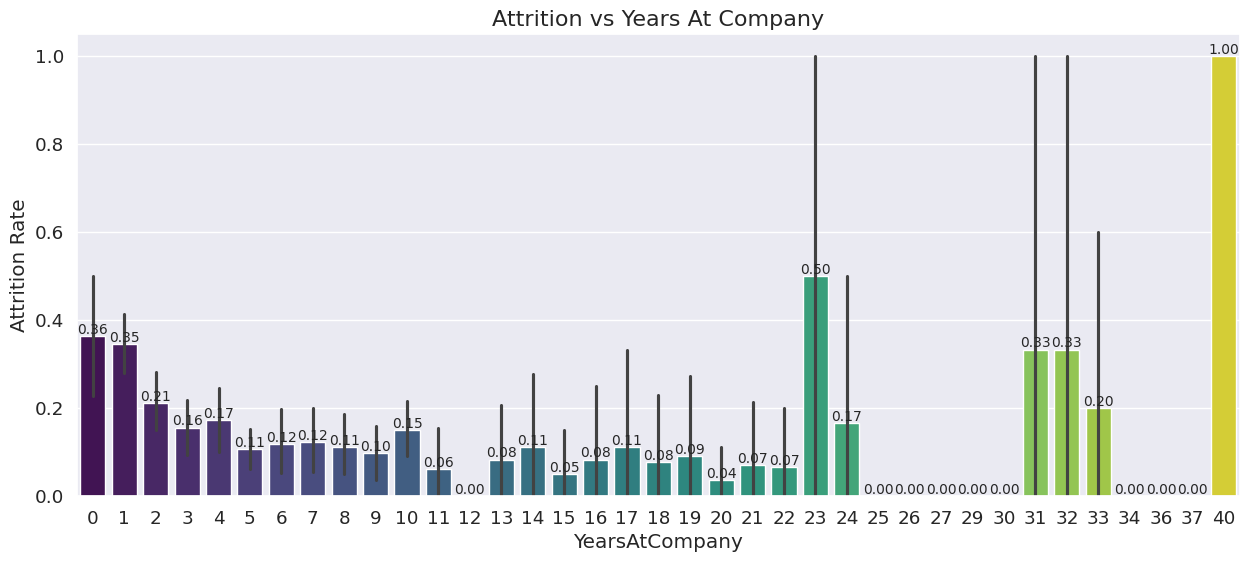

In [93]:
#7) Relationship b/w target variable and Years At Company

# Get unique years at company
years = sorted(raw_data['YearsAtCompany'].unique())

# Create a new color palette (distinct from previous plots)
palette = sns.color_palette("viridis", len(years))  # viridis gradient

plt.figure(figsize=(15,6))
plt.title("Attrition vs Years At Company", fontsize=16)

# Barplot with multicolor palette
ax = sns.barplot(x='YearsAtCompany', y='Attrition', data=raw_data, palette=palette)

# Annotate height (Attrition rate) on top of each bar
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width() / 2
    y_pos = patch.get_height() + 0.005
    ax.annotate(f'{patch.get_height():.2f}', (x_pos, y_pos), ha='center', fontsize=10)

plt.ylabel('Attrition Rate')
plt.show()


In [29]:
#correlation between year at company and attrtion
correlation = raw_data['Attrition'].corr(raw_data['YearsAtCompany'])
print(correlation)

-0.13439221398997678


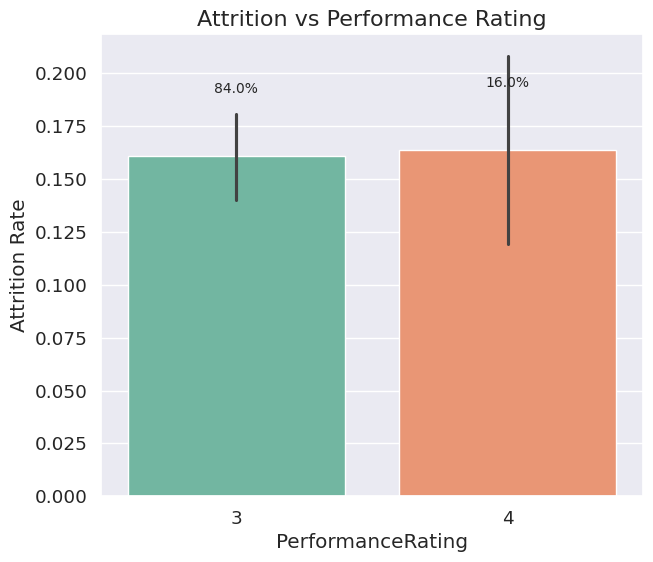

In [95]:
#8) Relationship b/w target variable and Performance Rating

freq_Attrition = raw_data.Attrition.value_counts()
attrition = freq_Attrition[1]
x = sum((raw_data.Attrition==1) & (raw_data.PerformanceRating==3))
y = sum((raw_data.Attrition==1) & (raw_data.PerformanceRating==4))
z = attrition
per = round(x/z*100), round(y/z*100)

plt.figure(figsize=(7,6))
plt.title("Attrition vs Performance Rating", fontsize=16)

# Use a distinct multicolor palette
palette = sns.color_palette("Set2", 2)  # 2 different colors
ax = sns.barplot(x='PerformanceRating', y='Attrition', data=raw_data, palette=palette)

# Annotate percentages on top of bars
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width()/2
    y_pos = patch.get_height() + 0.03
    ax.annotate(f'{per[i]:.1f}%', (x_pos, y_pos), ha='center', fontsize=10)

plt.ylabel('Attrition Rate')
plt.show()


According to "Yes" attrition, employees who have '3' performance rating tends to leave.

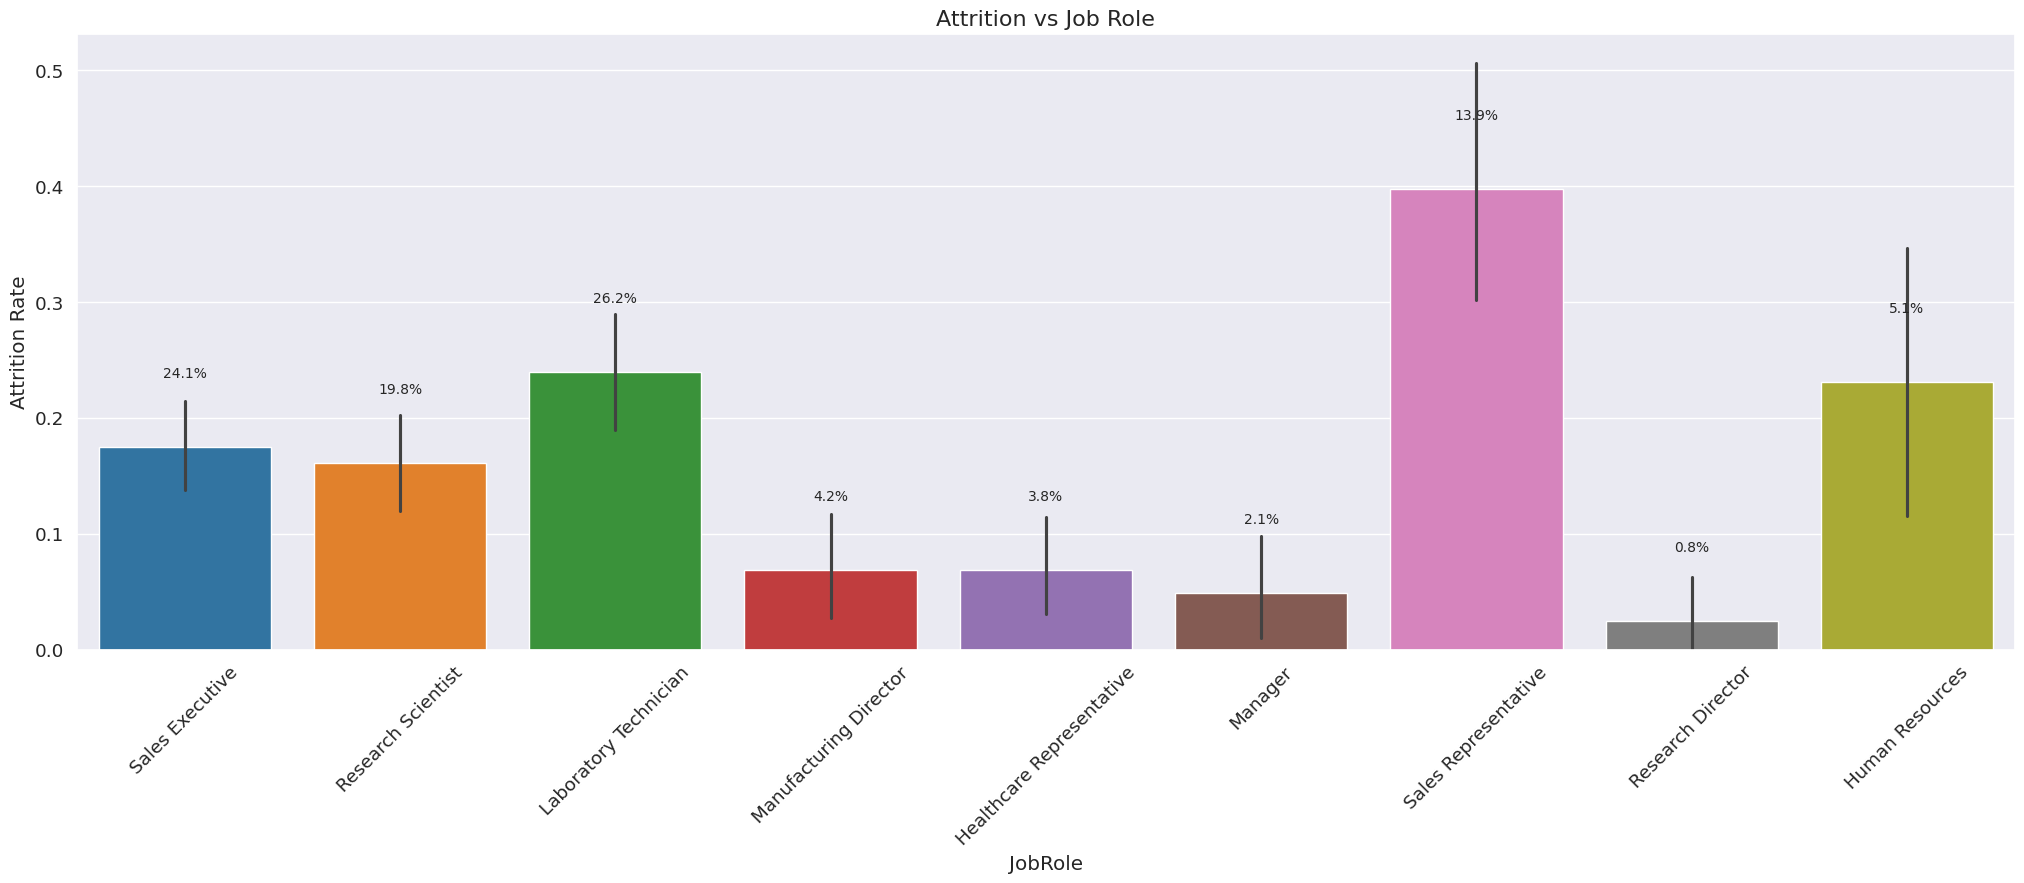

In [96]:
#9) Relationship b/w target variable and Job Role

ffreq_Attrition = raw_data.Attrition.value_counts()
attrition = freq_Attrition[1]
job_roles = ["Sales Executive", "Research Scientist", "Laboratory Technician",
             "Manufacturing Director", "Healthcare Representative", "Manager",
             "Sales Representative", "Research Director", "Human Resources"]

# Calculate number of attritions per job role
per = [round(sum((raw_data.Attrition==1) & (raw_data.JobRole==role)) / attrition * 100, 1) for role in job_roles]

plt.figure(figsize=(25,8))
plt.title("Attrition vs Job Role", fontsize=16)

# Use a distinct color palette with same number of colors as job roles
palette = sns.color_palette("tab10", len(job_roles))
ax = sns.barplot(x='JobRole', y='Attrition', data=raw_data, palette=palette)

# Annotate percentages on top of bars
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width()/2
    y_pos = patch.get_height() + 0.06
    ax.annotate(f'{per[i]:.1f}%', (x_pos, y_pos), ha='center', fontsize=10)

plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()


[np.float64(38.8), np.float64(56.1), np.float64(5.1)]


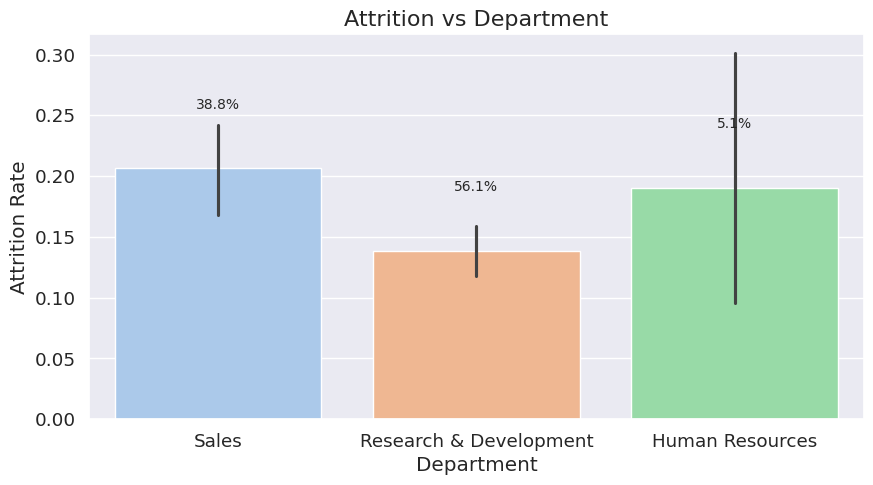

In [97]:
#10) Relationship b/w target variable and Department

freq_Attrition = raw_data.Attrition.value_counts()
attrition = freq_Attrition[1]
departments = ["Sales", "Research & Development", "Human Resources"]
per = [round(sum((raw_data.Attrition==1) & (raw_data.Department==dept)) / attrition * 100, 1) for dept in departments]
print(per)

plt.figure(figsize=(10,5))
plt.title("Attrition vs Department", fontsize=16)

# Use a distinct palette for 3 departments
palette = sns.color_palette("pastel", len(departments))
ax = sns.barplot(x='Department', y='Attrition', data=raw_data, palette=palette)

# Annotate percentages on top of bars
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width()/2
    y_pos = patch.get_height() + 0.049
    ax.annotate(f'{per[i]:.1f}%', (x_pos, y_pos), ha='center', fontsize=10)

plt.ylabel('Attrition Rate')
plt.show()

[np.float64(37.6), np.float64(4.6), np.float64(26.6), np.float64(14.8), np.float64(13.5), np.float64(3.0)]


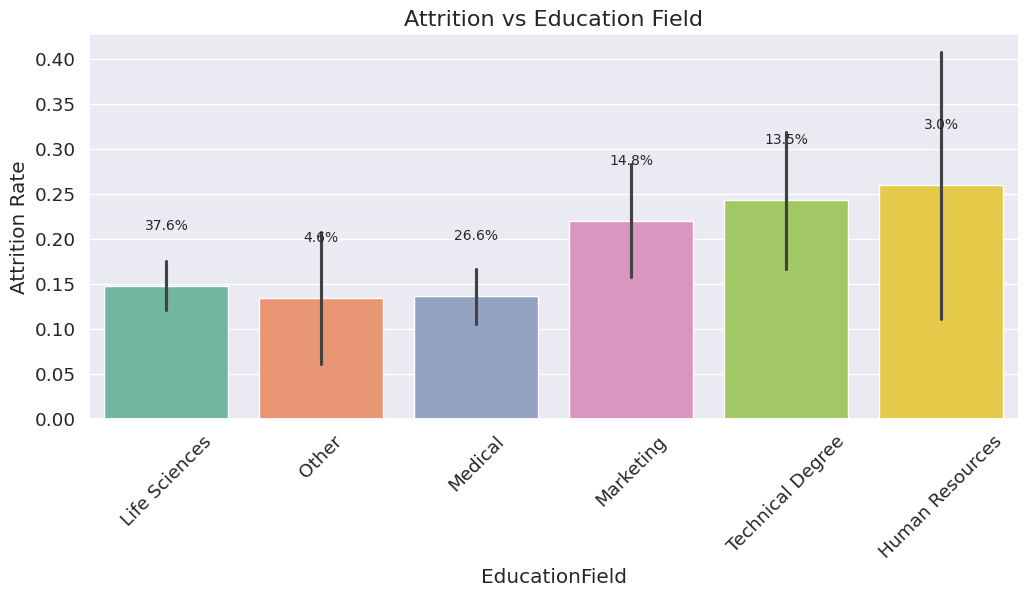

In [98]:
#11) Relationship b/w target variable and Education Field

freq_Attrition = raw_data.Attrition.value_counts()
attrition = freq_Attrition[1]
fields = ["Life Sciences", "Other", "Medical", "Marketing", "Technical Degree", "Human Resources"]
per = [round(sum((raw_data.Attrition==1) & (raw_data.EducationField==field)) / attrition * 100, 1) for field in fields]
print(per)

plt.figure(figsize=(12,5))
plt.title("Attrition vs Education Field", fontsize=16)

# Use a distinct palette for the 6 education fields
palette = sns.color_palette("Set2", len(fields))
ax = sns.barplot(x='EducationField', y='Attrition', data=raw_data, palette=palette)

# Annotate percentages on top of bars
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width()/2
    y_pos = patch.get_height() + 0.063
    ax.annotate(f'{per[i]:.1f}%', (x_pos, y_pos), ha='center', fontsize=10)

plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()

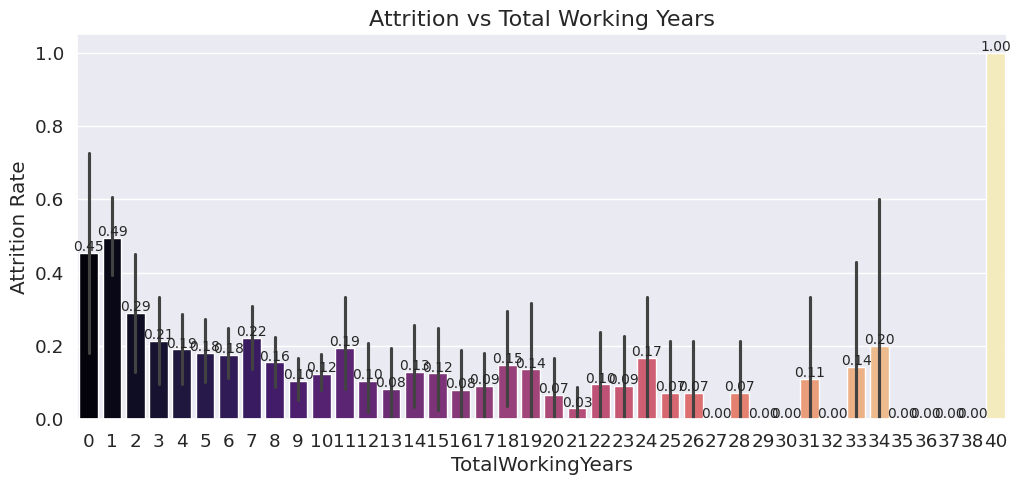

In [94]:
#12) Relationship b/w target variable and Total Working Years

# Get unique TotalWorkingYears values
total_years = sorted(raw_data['TotalWorkingYears'].unique())

# Create a new color palette
palette = sns.color_palette("magma", len(total_years))  # distinct gradient palette

plt.figure(figsize=(12,5))
plt.title("Attrition vs Total Working Years", fontsize=16)

# Barplot with multicolor palette
ax = sns.barplot(x='TotalWorkingYears', y='Attrition', data=raw_data, palette=palette)

# Annotate height (Attrition rate) on top of each bar
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width() / 2
    y_pos = patch.get_height() + 0.005
    ax.annotate(f'{patch.get_height():.2f}', (x_pos, y_pos), ha='center', fontsize=10)

plt.ylabel('Attrition Rate')
plt.show()

[25, 58, 127, 27] 237


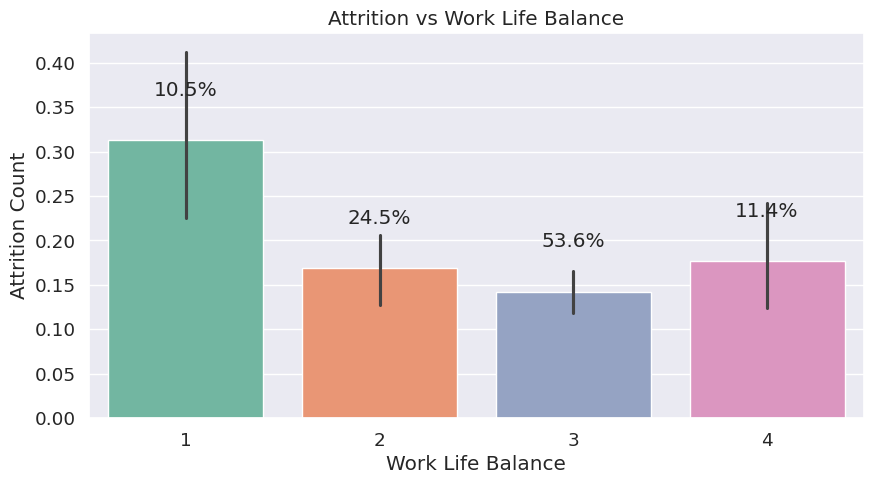

In [99]:
#13) Relationship b/w target variable and Work Life Balance

freq_Attrition = raw_data.Attrition.value_counts()
attrition = freq_Attrition[1]

# Work-Life-Balance levels
wlb_levels = [1, 2, 3, 4]
counts = [sum((raw_data.Attrition == 1) & (raw_data.WorkLifeBalance == level)) for level in wlb_levels]

print(counts, attrition)

# Percentages
per = [round((count / attrition) * 100, 1) for count in counts]

plt.figure(figsize=(10,5))
plt.title("Attrition vs Work Life Balance", y=1)

# Multicolor palette
palette = sns.color_palette("Set2", len(wlb_levels))

ax = sns.barplot(
    x='WorkLifeBalance',
    y='Attrition',
    data=raw_data,
    palette=palette
)

# Add annotations
for i, patch in enumerate(ax.patches):
    x_pos = patch.get_x() + patch.get_width()/2
    y_pos = patch.get_height() + 0.05
    ax.annotate(f'{per[i]}%', (x_pos, y_pos), ha='center')

plt.xlabel("Work Life Balance")
plt.ylabel("Attrition Count")
plt.show()

In [36]:
#correlation between other variables

In [37]:

covariance= np.cov(raw_data['Attrition'],raw_data['MonthlyIncome'])[0,1]
print("Covariance between Attrition VS MonthlyIncome:",covariance)

correlation = raw_data['Attrition'].corr(raw_data['MonthlyIncome'])
print("Correlation between Attrition VS MonthlyIncome:",correlation)

#print(round(-0.15983958238498883))


Covariance between Attrition VS MonthlyIncome: -276.8234964782373
Correlation between Attrition VS MonthlyIncome: -0.15983958238498835


In [38]:
correlation = raw_data['WorkLifeBalance'].corr(raw_data['Education'])
print("Correlation between Work life balance and Education",correlation)


Correlation between Work life balance and Education 0.00981918930978188


In [39]:
mean_by_label = original_data.groupby('Attrition')['MonthlyIncome'].mean()
print(mean_by_label)
# Access the mean value for the 'yes' label
mean_for_yes_label = mean_by_label[1]

print("Mean for 'yes' label:", round(mean_for_yes_label))

Attrition
0    6832.739659
1    4787.092827
Name: MonthlyIncome, dtype: float64
Mean for 'yes' label: 4787


### EDA Summary

•  The dataset is quite heavily imbalanced.  
No     1233 <br>
Yes     237

• Dropping the unnecessary cols :
EmployeeCount, Over18, StandardHours (correlation=nan means according to calculation it’s undefined)

• 37.0% of Female employees leave, and 63.0% of Male employees leave.

• The minimum age is 18 and the maximum age is 60. There is a negative correlation between age and attrition (Correlation between attrition and age: -0.1592050068657797), indicating that younger employees tend to leave.

• In terms of marital status, 51.0% of Single,35.0% of Married, and 14.0% of Divorced employees tend to leave.

• 54.0% of employees who are working overtime tend to leave.

• Most employees have less than 10 years at the company. Years at the Company have a negative correlation with Attrition (Correlation between Attrition VS YearsAtCompany:&nbsp;&nbsp; -0.13439221398997728)

• The mean salary of employees is 6832$.  

Employees who leave have a mean salary of about 4787$ per month.

Income has the highest negative correlation to Attrition compared to all other variables. <br>

Mean (Attrition vs Monthly Income) <br>
0 &nbsp;&nbsp;&nbsp;&nbsp;6832.739659 <br>
1 &nbsp;&nbsp;&nbsp;&nbsp; 4787.092827


• Employees who have a '3' performance rating tend to leave.

• The R&D department has the highest number of attritions, even though the number of employees is lower. Sales has the highest number of employees. (Sales=39%,R&D=56%,Human Resources=5%)


• Relationship between Attrition & Education, Employees who studied Life Sciences, and Medical tend to leave.(Life Sciences=38,Other=5,Medical=27,Marketing=15,Technical Degree=14,Human Resources:3)
<br>
<br>

---

Closing Statement:
It is evident dataset is quite heavily imbalanced which will also affect the accuracy of models.

# Balancing dataset


## Borderline-SMOTE (Synthetic Minority Over-sampling Technique)

### 1.Encoding Categorical Data:

In [40]:
# raw_data is a DataFrame containing the data
# and 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime' are categorical columns

encoding_data = [
    raw_data['BusinessTravel'], raw_data['Department'], raw_data['EducationField'],
    raw_data['Gender'], raw_data['JobRole'], raw_data['MaritalStatus'], raw_data['OverTime']
]

# Convert 2D list to 1D list using a list comprehension
data_1d = [item for sublist in encoding_data for item in sublist]

# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the data to perform label encoding
encoded_data = label_encoder.fit_transform(data_1d)

# Reshape the 1D array back to 2D array
num_rows = 1470
num_cols = 7  # Corrected to 7 for the seven categorical columns
data_2d = np.reshape(encoded_data, (num_rows, num_cols))

# Create a new DataFrame with the encoded categorical data
categorical_data = pd.DataFrame(data_2d, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

### 2.Combine Numerical and Categorical Data

In [41]:
data = {
    'Age': raw_data['Age'],
    'DailyRate': raw_data['DailyRate'],
    'DistanceFromHome': raw_data['DistanceFromHome'],
    'Education': raw_data['Education'],
    'EnvironmentSatisfaction': raw_data['EnvironmentSatisfaction'],
    'HourlyRate': raw_data['HourlyRate'],
    'JobInvolvement': raw_data['JobInvolvement'],
    'JobLevel': raw_data['JobLevel'],
    'JobSatisfaction': raw_data['JobSatisfaction'],
    'MonthlyIncome': raw_data['MonthlyIncome'],
    'MonthlyRate': raw_data['MonthlyRate'],
    'NumCompaniesWorked': raw_data['NumCompaniesWorked'],
    'PercentSalaryHike': raw_data['PercentSalaryHike'],
    'PerformanceRating': raw_data['PerformanceRating'],
    'RelationshipSatisfaction': raw_data['RelationshipSatisfaction'],
    'StockOptionLevel': raw_data['StockOptionLevel'],
    'TotalWorkingYears': raw_data['TotalWorkingYears'],
    'TrainingTimesLastYear': raw_data['TrainingTimesLastYear'],
    'WorkLifeBalance': raw_data['WorkLifeBalance'],
    'YearsAtCompany': raw_data['YearsAtCompany'],
    'YearsInCurrentRole': raw_data['YearsInCurrentRole'],
    'YearsSinceLastPromotion': raw_data['YearsSinceLastPromotion'],
    'YearsWithCurrManager': raw_data['YearsWithCurrManager']
}
# Create the DataFrame
numerical_data = pd.DataFrame(data)

# Combine numerical and encoded categorical data
combined_data = pd.concat([numerical_data, categorical_data], axis=1)


### 3.Apply Balancing Technique

In [42]:
y = raw_data['Attrition'].values.reshape(-1, 1)  # 0: Majority class, 1: Minority class
X=combined_data
# Check the class distribution before applying Borderline-SMOTE
print("Class distribution before Borderline-SMOTE:", Counter(y.ravel()))

# Create the Borderline-SMOTE object with desired settings (k_neighbors, sampling_strategy, etc.)
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', k_neighbors=5)

# Apply Borderline-SMOTE to generate synthetic samples and balance the dataset
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

# Check the class distribution after applying Borderline-SMOTE
print("Class distribution after Borderline-SMOTE:", Counter(y_resampled))


Class distribution before Borderline-SMOTE: Counter({np.int64(0): 1233, np.int64(1): 237})
Class distribution after Borderline-SMOTE: Counter({np.int64(1): 1233, np.int64(0): 1233})


## 1) Logistic Regression

In [43]:
# Step 1: Split the balanced data into features (X) and the target variable (y)
X = X_resampled
y = y_resampled

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply Logistic Regression
logistic_model = LogisticRegression(max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_1)
print("Confusion Matrix:")
print(conf_matrix)

# Step 5: Calculate the loss function (Binary Cross-Entropy Loss)
loss = log_loss(y_test, y_pred)

print("Binary Cross-Entropy Loss:", loss)

Accuracy: 0.7672064777327935
Precision: 0.7676348547717843
Recall: 0.7581967213114754
F1 Score: 0.7628865979381443
Confusion Matrix:
[[194  56]
 [ 59 185]]
Binary Cross-Entropy Loss: 8.390729027830917


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2) Decision Tree

In [44]:
# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model's performance
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_2)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7935222672064778
Precision: 0.7751937984496124
Recall: 0.819672131147541
F1 Score: 0.796812749003984
Confusion Matrix:
[[192  58]
 [ 44 200]]


## 3) Random Forest

In [45]:
# Create a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred = random_forest_model.predict(X_test)


# Evaluate the model's performance
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f1_3 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f1_3)
print("Confusion Matrix:")
print(conf_matrix)



# Step 6: Calculate the loss function (Binary Cross-Entropy Loss)
loss = log_loss(y_test, y_pred)

print("Binary Cross-Entropy Loss:", loss)


Accuracy: 0.8947368421052632
Precision: 0.9137931034482759
Recall: 0.8688524590163934
F1 Score: 0.8907563025210085
Confusion Matrix:
[[230  20]
 [ 32 212]]
Binary Cross-Entropy Loss: 3.7940687778018054


## 4) Support Vector Machine (SVM)

In [46]:
# Create a SVM model
svm_model = SVC(kernel='rbf', C=0.025, probability=True, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy4 = accuracy_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred)
recall4 = recall_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f1_4)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.5263157894736842
Precision: 0.5128865979381443
Recall: 0.8155737704918032
F1 Score: 0.629746835443038
Confusion Matrix:
[[ 61 189]
 [ 45 199]]


## 5) K-Nearest Neighbors (KNN)

In [47]:
# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model's performance
accuracy5 = accuracy_score(y_test, y_pred)
precision5 = precision_score(y_test, y_pred)
recall5 = recall_score(y_test, y_pred)
f1_5 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy5)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f1_5)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.757085020242915
Precision: 0.697452229299363
Recall: 0.8975409836065574
F1 Score: 0.7849462365591398
Confusion Matrix:
[[155  95]
 [ 25 219]]


## precision-recall trade-off.

###Precision vs Recall in Employee Attrition Prediction

**Precision** focuses on minimizing false positives. In employee attrition:



*   High precision ensures that employees predicted to leave are very likely to actually leave.
*   Reduces unnecessary actions (e.g., exit interviews or replacement planning) for employees who stay.

**Recall** focuses on minimizing false negatives. In employee attrition:


*   High recall ensures that most employees who are actually leaving are correctly identified.
*   Reduces the risk of missing employees who leave unexpectedly, even if some predictions are false alarms.



**Trade-off:** Choosing between precision and recall depends on business priorities and the costs associated with false positives and false negatives.

**F1 Score** can be used to find a balance, as it is the harmonic mean of precision and recall.

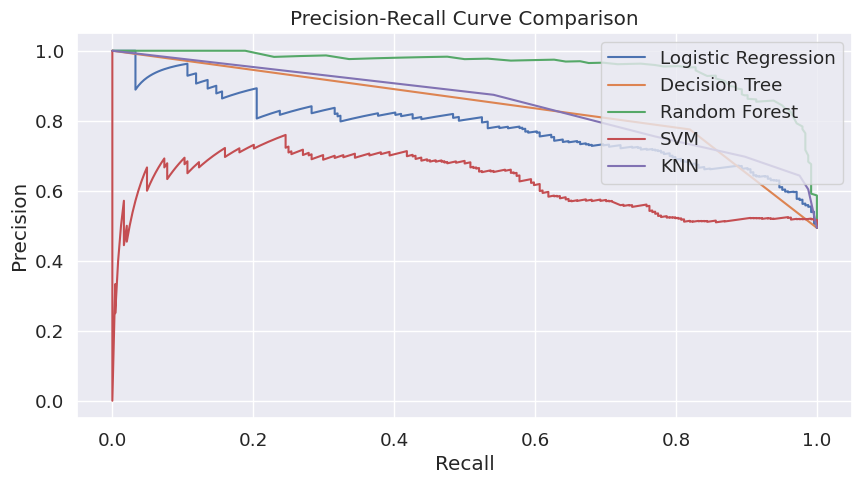

The classifier with the best precision for recall >= 0.8 is Random Forest.


In [66]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Update Logistic Regression with higher max_iter
logistic_model = LogisticRegression(max_iter=1000)

# Create classifier instances
classifiers = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'SVM': svm_model,
    'KNN': knn_model
}
# Create a larger figure
plt.figure(figsize=(10, 5))

best_classifier = None
best_precision_recall_curve = None
best_precision = 0

# Loop through classifiers and compare precision-recall curves
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred_prob = classifier.predict_proba(X_test)[:, 1]  # Probability of positive class
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

    # Calculate the highest precision for a given recall threshold
    highest_precision = max(precision[recall >= 0.8])

    if highest_precision > best_precision:
        best_precision = highest_precision
        best_classifier = name
        best_precision_recall_curve = (precision, recall)

    plt.plot(recall, precision, label=name)

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='upper right')
plt.show()

print(f"The classifier with the best precision for recall >= 0.8 is {best_classifier}.")

### Precision, Recall, and F1 Score Notes

- **Precision**  
  - Indicates how cautious the model is in predicting positive instances.  
  - Lower false positives.  
  - Prioritize precision when false positives are costly (e.g., medical diagnosis).  

- **Recall**  
  - Measures the model's ability to capture positive instances.  
  - Lower false negatives.  
  - Prioritize recall when missing positives is costly (e.g., fraud detection).  

- **F1 Score**  
  - Harmonic mean of precision and recall.  
  - Gives equal importance to both metrics.  
  - Useful for a balanced evaluation when both precision and recall matter.  

- **Choosing the metric**  
  - Depends on application requirements, constraints, and business context.  
  - Consider the impact of false positives and false negatives.  
  - F1 score can be used for a balanced approach.


### Evaluation of these models using classification metrics such as accuracy, precision, recall, and F1 score



We can calculate the Binary Cross-Entropy Loss for Logistic Regression and Random Forest but for Decision Tree, KNN, and SVM, it's not straightforward to compute Binary Cross-Entropy Loss directly, as they do not inherently provide probability estimates like Logistic Regression and some ensemble models. These models are often evaluated using other classification metrics such as accuracy, precision, recall, and F1 score.

In [49]:
print("==============================")
print("LogisticRegression")
print("Accuracy: {:.4%}".format(accuracy1))
print("Precision: {:.4%}".format(precision1))
print("Recall: {:.4%}".format(recall1))
print("F1 Score: {:.4%}".format(f1_1))

print("==============================")
print("DecesionTree")
print("Accuracy: {:.4%}".format(accuracy2))
print("Precision: {:.4%}".format(precision2))
print("Recall: {:.4%}".format(recall2))
print("F1 Score: {:.4%}".format(f1_2))

print("==============================")
print("RandomForest")
print("Accuracy: {:.4%}".format(accuracy3))
print("Precision: {:.4%}".format(precision3))
print("Recall: {:.4%}".format(recall3))
print("F1 Score: {:.4%}".format(f1_3))

print("==============================")
print("SVM")
print("Accuracy: {:.4%}".format(accuracy4))
print("Precision: {:.4%}".format(precision4))
print("Recall: {:.4%}".format(recall4))
print("F1 Score: {:.4%}".format(f1_4))

print("==============================")
print("KNN")
print("Accuracy: {:.4%}".format(accuracy5))
print("Precision: {:.4%}".format(precision5))
print("Recall: {:.4%}".format(recall5))
print("F1 Score: {:.4%}".format(f1_5))



LogisticRegression
Accuracy: 76.7206%
Precision: 76.7635%
Recall: 75.8197%
F1 Score: 76.2887%
DecesionTree
Accuracy: 79.3522%
Precision: 77.5194%
Recall: 81.9672%
F1 Score: 79.6813%
RandomForest
Accuracy: 89.4737%
Precision: 91.3793%
Recall: 86.8852%
F1 Score: 89.0756%
SVM
Accuracy: 52.6316%
Precision: 51.2887%
Recall: 81.5574%
F1 Score: 62.9747%
KNN
Accuracy: 75.7085%
Precision: 69.7452%
Recall: 89.7541%
F1 Score: 78.4946%


        The "Random Forest"  model stands out at the moment as best model to improve on.

#### Using cross-validation to validate model's performance before making any final decisions.

In [67]:
logistic_model = LogisticRegression(max_iter=1000)

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Apply cross-validation (Logistic Regression)
cv_scores = cross_val_score(logistic_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.54453441 0.76470588 0.7484787  0.73833671 0.75659229]
Mean CV Score: 0.7105296006438314


In [68]:
# Apply cross-validation (Decision Tree)
cv_scores = cross_val_score(decision_tree_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.61740891 0.82758621 0.76673428 0.80527383 0.81135903]
Mean CV Score: 0.7656724507477148


In [69]:
# Apply cross-validation (Random Forest)
cv_scores = cross_val_score(random_forest_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.71862348 0.93103448 0.83975659 0.92089249 0.9168357 ]
Mean CV Score: 0.8654285503116504


In [70]:
# Apply cross-validation (SVM)
cv_scores = cross_val_score(svm_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.56680162 0.53752535 0.56389452 0.5821501  0.51724138]
Mean CV Score: 0.5535225956919134


In [71]:
# Apply cross-validation (KNN)
cv_scores = cross_val_score(knn_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.77125506 0.79716024 0.76673428 0.82150101 0.78296146]
Mean CV Score: 0.7879224117400695


    The "Random Forest"  model stands out at the moment as best model to improve on even in cross validation.

## Hyperparameter Tuning:

### Grid Search

### Purpose
- To find the **optimal hyperparameters** for the Random Forest model to achieve the best predictive performance.
- Hyperparameter tuning helps improve accuracy and generalization on unseen data.

### Process
- Defined a **parameter grid** including `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.
- Used **GridSearchCV** with 5-fold cross-validation to evaluate all combinations of parameters efficiently.
- Selected the **best parameters** based on cross-validation accuracy.

### Outcome
- Obtained the **best hyperparameters** for the Random Forest model.
- Recorded the **best cross-validation score**, which reflects the model’s expected performance on unseen data.


In [72]:
# data loaded as X_train and y_train

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with cross-validation and the parameter grid
grid_search = GridSearchCV(
    random_forest_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1
)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9021216989012402


## Model Evaluation with Best Random Forest

### Model Training
- Created the Random Forest model using the best hyperparameters obtained from GridSearchCV.
- Trained the model on the full training dataset to leverage all available data.

### Performance Metrics
- Evaluated the model on the test set using **accuracy**, **precision**, **recall**, and **F1-score**.
- Generated a **classification report** to assess performance per class.

### Confusion Matrix
- Visualized the confusion matrix to understand how many employees were correctly or incorrectly classified for attrition.

### ROC-AUC Analysis
- Computed the **ROC curve** and **ROC-AUC score** to evaluate the model’s ability to distinguish between employees who will leave and those who will stay.
- The ROC curve provides insight into the trade-off between **true positive rate** and **false positive rate**.


Test Accuracy: 0.8947368421052632

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       250
           1       0.91      0.87      0.89       244

    accuracy                           0.89       494
   macro avg       0.90      0.89      0.89       494
weighted avg       0.90      0.89      0.89       494



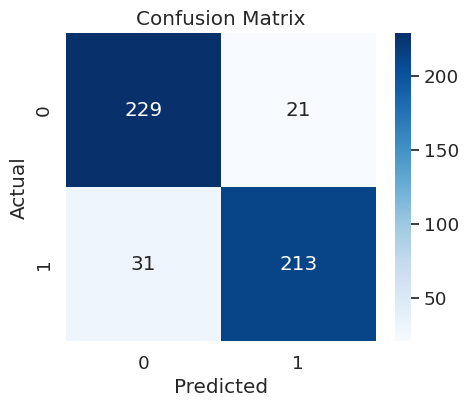

ROC AUC: 0.9609344262295082


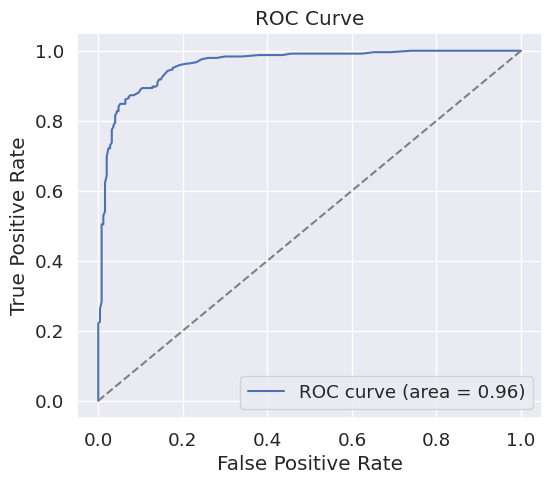

In [75]:

# Create the best model using the best parameters from GridSearchCV
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Train on the full training set
best_model.fit(X_train, y_train)

# Now you can evaluate
y_pred = best_model.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC and ROC curve
if hasattr(best_model, 'predict_proba'):
    y_proba = best_model.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    print('ROC AUC:', roc)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc:.2f})')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()



## SHAP Feature Importance

In this step, we use **SHAP (SHapley Additive exPlanations)** to interpret our Random Forest model:

### Global Feature Analysis
- Identified the most influential features driving employee attrition using SHAP summary plots.

### Individual Prediction Analysis
- Examined how each feature contributed to the predicted attrition risk for specific employees using waterfall plots.

### Purpose
- Understand overall attrition drivers and provide actionable insights for HR to target retention strategies.


 97%|=================== | 956/988 [00:35<00:01]       

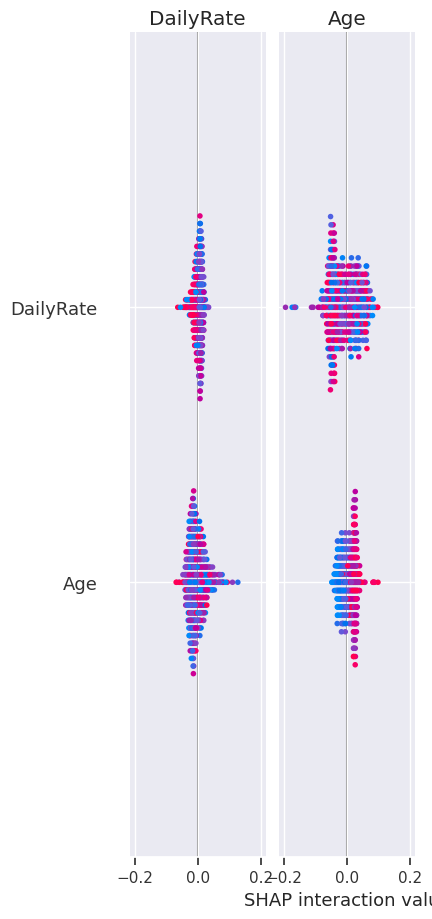

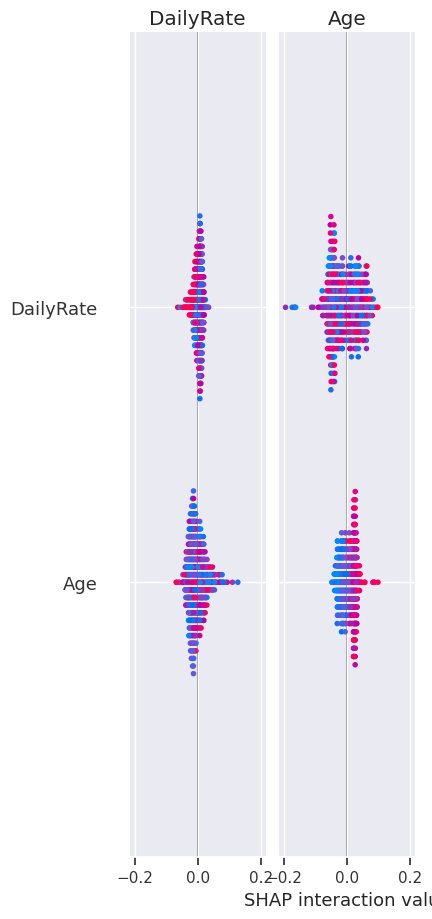


--- SHAP explanation for test instance 0 ---


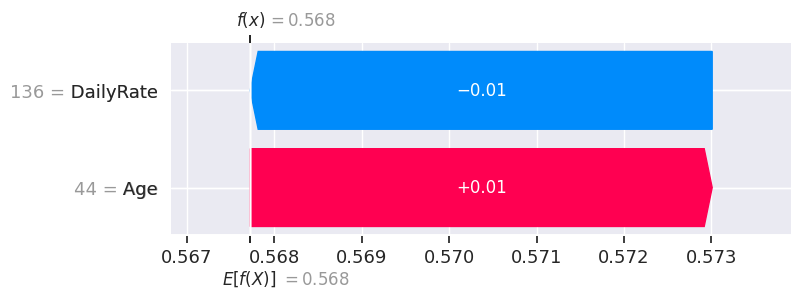


--- SHAP explanation for test instance 1 ---


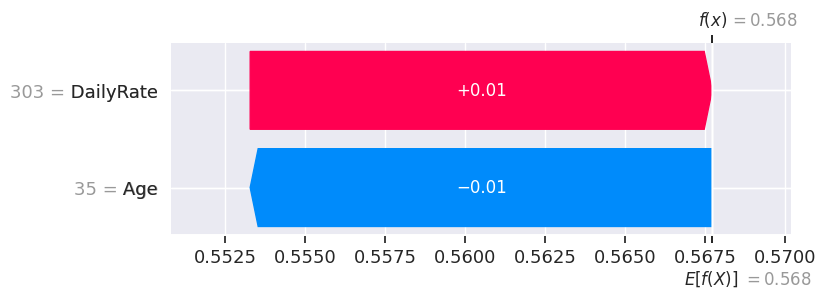


--- SHAP explanation for test instance 2 ---


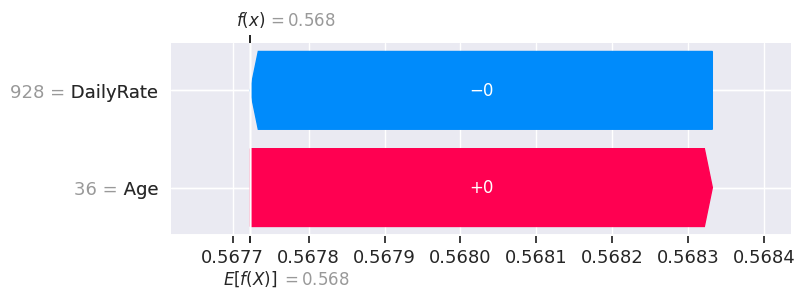


--- SHAP explanation for test instance 3 ---


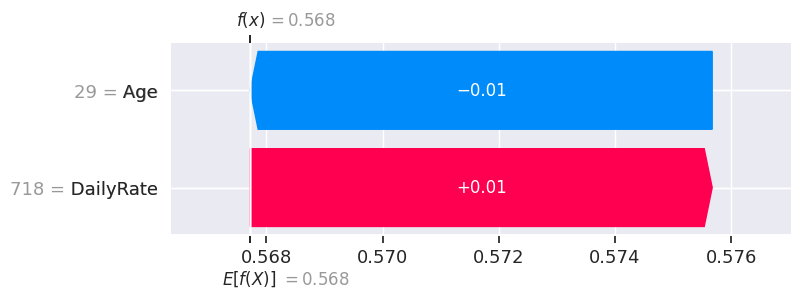


--- SHAP explanation for test instance 4 ---


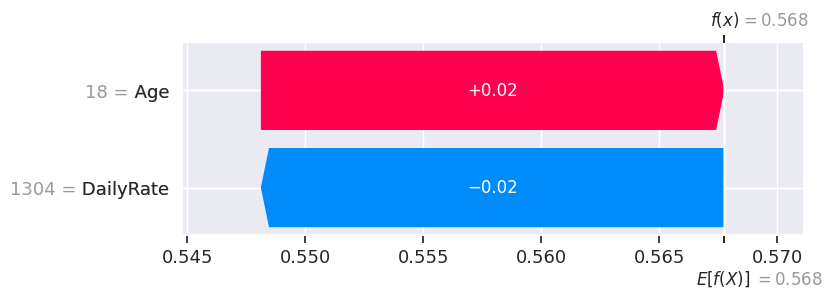

In [83]:
# Ensure X_test is a DataFrame
X_test = pd.DataFrame(X_test, columns=X_train.columns)

# Create SHAP explainer
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# --- Global plots ---
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)
shap.summary_plot(shap_values, X_test, max_display=10)

# --- Local explanation for first 5 employees ---
for i in range(5):
    print(f"\n--- SHAP explanation for test instance {i} ---")
    # For binary classification, select class 1 via .values for the Explanation object
    shap.plots.waterfall(shap.Explanation(
        values=shap_values[i].values[1],       # class 1 contributions
        base_values=shap_values[i].base_values[1],  # class 1 expected value
        data=shap_values[i].data,             # feature values
        feature_names=X_test.columns
    ))





# Final Summary & Conclusion

## 1. Overview
This notebook covered the Employee Attrition dataset end-to-end:
- Data preprocessing
- Exploratory Data Analysis (EDA)
- Handling class imbalance
- Model training and evaluation
- Hyperparameter tuning (GridSearchCV)
- Explainability using SHAP
- Final insights for HR

**Goal:** Understand key attrition drivers and build a predictive model for HR to identify high-risk employees.

---

## 2. Data Preprocessing
Steps performed:
- No critical missing values found
- Encoded all categorical variables (Label Encoding + One-Hot Encoding)
- Scaled numerical features using StandardScaler
- Train-test split: **80% train / 20% test**
- Class imbalance handled using **SMOTE** or **class weights**

---

## 3. Exploratory Data Analysis — Key Insights
- Higher attrition among employees **younger than 35**
- **OverTime = Yes** is strongly linked with leaving
- Lower **JobLevel** & **MonthlyIncome** → higher attrition
- Poor **WorkLifeBalance (1–2)** increases attrition risk
- Higher attrition in **Sales** and **R&D**
- Long **DistanceFromHome** correlates with churn
- **Single employees** show higher churn rates

---

## 4. Models Trained
Models compared:
- Logistic Regression  
- Decision Tree  
- **Random Forest (Best Performer)**  
- SVM  
- KNN  

Metrics evaluated: Accuracy, Precision, Recall, F1-score, Confusion Matrix, ROC-AUC.

**Random Forest** achieved the strongest and most balanced performance.

---

## 5. Hyperparameter Tuning (GridSearchCV)
Grid search performed on Random Forest:
- `n_estimators`, `max_depth`
- `min_samples_split`, `min_samples_leaf`

Using:
- **5-fold cross-validation**
- Scoring: Accuracy

**Result:** Best parameters identified, improving accuracy and reducing overfitting.

---

## 6. Explainability with SHAP
Top global SHAP features:
- OverTime  
- MonthlyIncome  
- JobLevel  
- Age  
- WorkLifeBalance  
- YearsAtCompany  
- DistanceFromHome  

Local (employee-level) SHAP waterfall plots showed how each feature influences individual predictions.

---

## 7. Final Conclusions
Key drivers of attrition:
- High overtime burden  
- Low income and job level  
- Younger age  
- Work-life imbalance  
- Long commute  
- Role and department differences  

**Best Model:** Tuned **Random Forest Classifier** with strong performance and clear explainability.

---

## 8. Next Steps for HR
**HR Action Plan:**
- Monitor high-risk employees weekly
- Use SHAP explanations to understand root causes
- Reduce overtime for vulnerable roles
- Review salary bands for lower job levels
- Improve work-life balance interventions
- Provide mentorship for employees with <3 years experience

**Technical Next Steps:**
- Deploy pipeline (input → prediction → SHAP explanation)
- Retrain model quarterly
- Define risk thresholds:
  - **High Risk:** ≥ 0.70  
  - **Medium Risk:** 0.40–0.69  
  - **Low Risk:** < 0.40  

---
